
**Question [1]:** Open this script and explain its contents. You will see that the first dataset is used, and the SVM is graphically represented. Comment on what type of kernel is being used, and what are the training parameters.

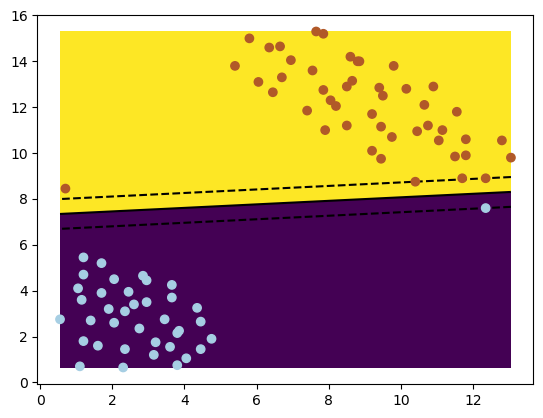

In [3]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
"""
Created on Mon Nov 24 10:14:36 2022

@author: pedroa
"""

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import svm

# Load the dataset
data = pd.read_csv('dataset1.csv',header=None)
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

# Train the SVM model
svm_model = svm.SVC(kernel='linear',C=100)
svm_model.fit(X, y)

# Show the points
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

# Show the separating hyperplane
plt.axis('tight')
# Extract the limit of the data to construct the mesh
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

# Create the mesh and obtain the Z value returned by the SVM
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Make a color plot including the margin hyperplanes (Z=-1 and Z=1) and the
# separating hyperplane (Z=0)
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1])
plt.show()



```
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import svm
```
 First of all, it's necessary to import the following modules:  
 - *numpy* to work with arrays.
 - *matplotlib* to plot the points, graphics and the representation of the separation and mesh.
 - *pandas* to work with dataframes.
 - *svm* from *sklearn* module in order to train a model with the data in the csv files.



```
data = pd.read_csv('dataset1.csv',header=None)
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
```
This block loads the data form the file *dataset1.csv*. From the dataset, X stores all rows and columns except the last one, and y stores all rows and just the last column of each row. Both vectors are converted into numpy arrays by using ```value```.



```
svm_model = svm.SVC(kernel='linear',C=100)
svm_model.fit(X, y)
```
These two lines are the most immportant ones. They describe the model it's going to be used to train the model. The kernel that is used is the linear model. The reason for the choice of this model may be that it is possible that the points can be separated by a straight and linear hyperplane. If they cannot be separated by a straight hyperplane, it would be more convenient to use other models like RBF or polynomial ones.

The parameter C represents a coefficient that regulates the penalty for misclassification errors in training. If this value is high, it will give accuracy to the model but the margins will be small, and this causes overfitting. However, when the values are smaller, the model will be more tolerant to noise but its margins will be larger.

```
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)
```

This code just scatter the points by taking the two dimensions represented in columns 0 and 1 in X. The c parameter represents the color given by the label of each point, zorder represents the order of the layer the points are scatter, and cmap creates a color map predefined by the macro plt.cm.Paired that is used to represents categorical data with different colors.

```
plt.axis('tight')

x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()
```
In this part, the hyperplane is shown and the coordinates of the maximun and minimun points of the hyperplane (in this case it's a straight line) are stored on these variables.

```
XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])
```
The *mgrip* function generates a dotted mesh that goes from the minimun to the maximun point of the hyperplane. This mesh has 500 points. In the second line, the points in the mesh are combined in a matrix, and this matrix is an argument in the *decision_function* that calculates the distance between the point and the hyperplane. That's stored in Z variable.

```
Z = Z.reshape(XX.shape)
plt.pcolormesh(XX, YY, Z > 0)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                levels=[-1, 0, 1])
plt.show()
```
This first reshapes the Z vector with the XX dimension. Then, the color mesh is ploted, and finallly the contour of the lines that separates the classes clasified are drown with dashed lines the external ones and with a continuous line the middle one.



Execute the above-mentioned script but comment the lines corresponding to the SVM’s graphic representation, to see only the points of the dataset (the representation should be similar to that of Figure 1, dataset1.csv)

**Question [2]:** Intuitively, which hyper plane do you think will make the least
mistake in the task of separating the two kinds of points?

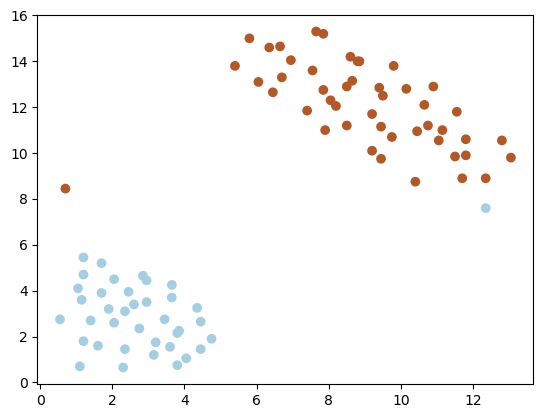

In [4]:
plt.figure(1)
plt.clf()
plt.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

Intuitively, the hyperplane which best separates the different points is an straight line from top-left to bottom-right through the gap. By usign this separation, we can ensure that future test points would be well classified.

**Question [3]:** Modify the script trying different values for C, specifically, C $ϵ$ {$10^{-2}, 10^{-1}, 10^{0}, 10^{1}, 10^{2}, 10^{3}, 10^{4}$}. Observe what is happening, explaining why and select the most adequate value for C.

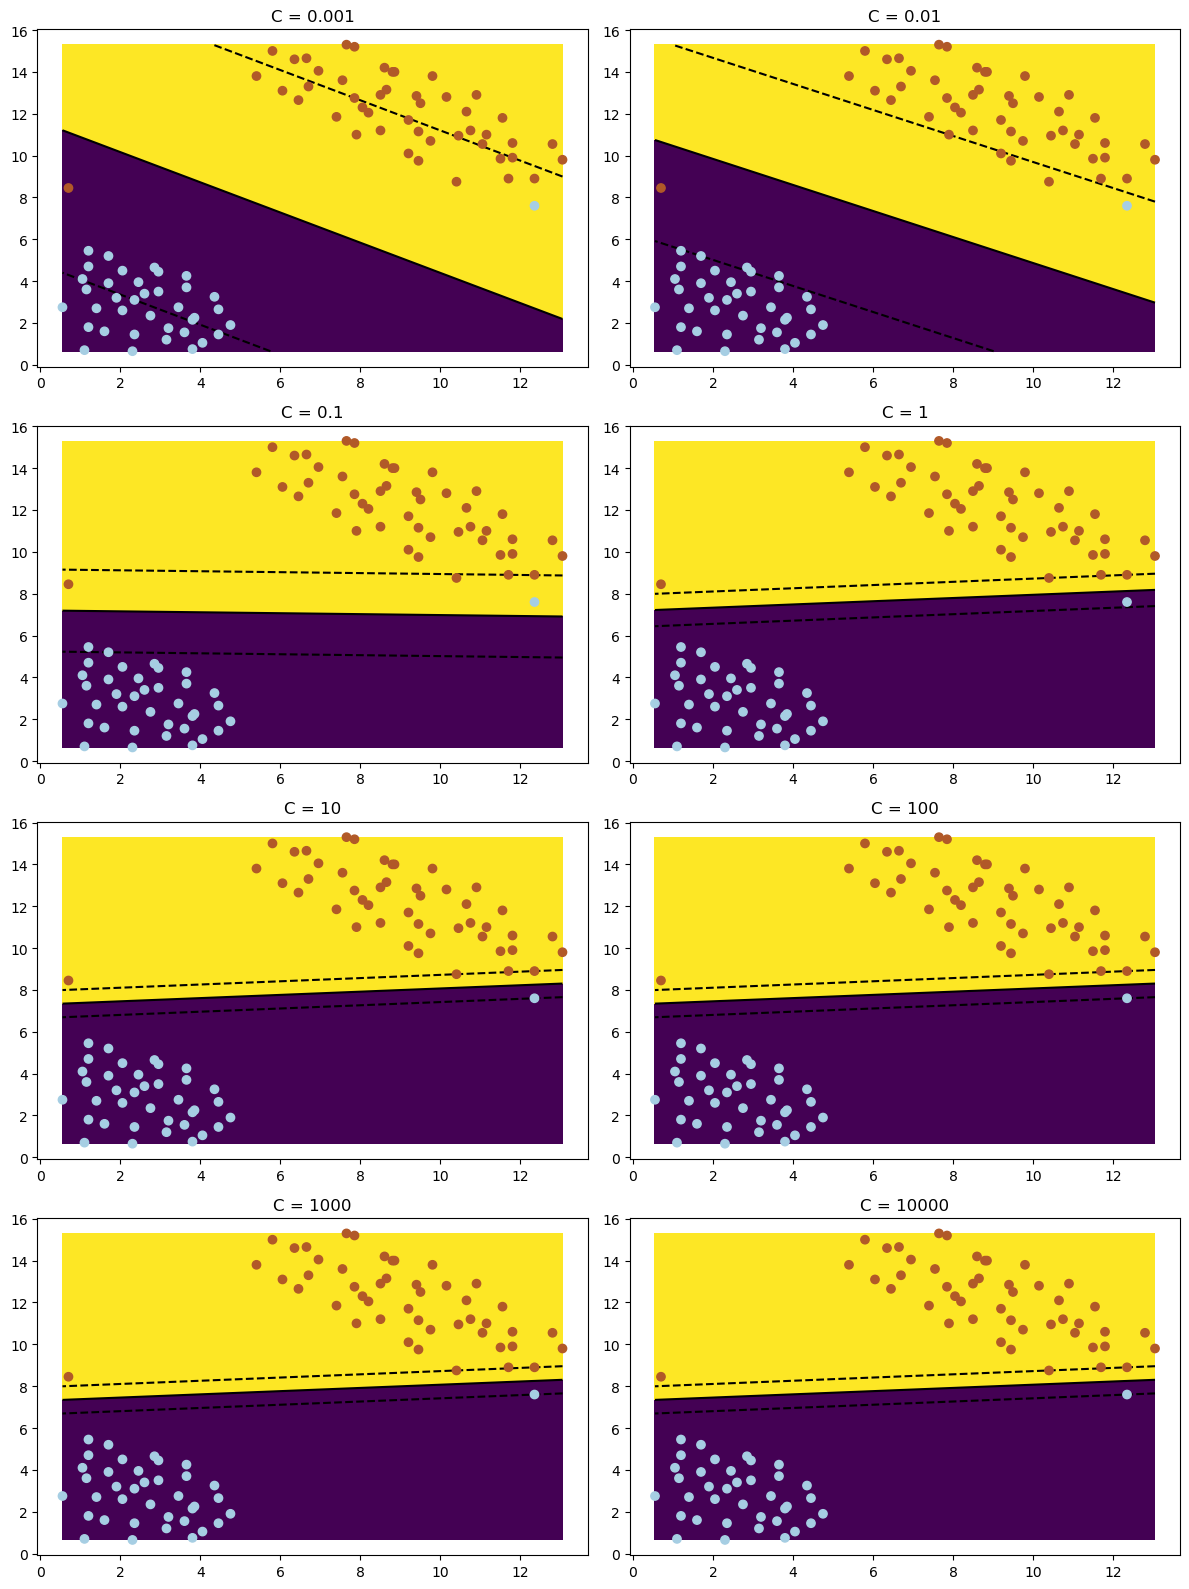

In [5]:
# Values of C hyperaprameter
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
# I have added the 10^-3 value to make the graph grid symmetric.

# Create a 4x2 grid (enough for 7 plots) for the subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
axes = axes.flatten()

for idx, (c, ax) in enumerate(zip(c_values, axes)):
  # Train the SVM model
  svm_model = svm.SVC(kernel='linear',C=c)
  svm_model.fit(X, y)

  # Show the points
  ax.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

  # Show the separating hyperplane
  ax.axis('tight')
  # Extract the limit of the data to construct the mesh
  x_min = X[:, 0].min()
  x_max = X[:, 0].max()
  y_min = X[:, 1].min()
  y_max = X[:, 1].max()

  # Create the mesh and obtain the Z value returned by the SVM
  XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
  Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

  # Make a color plot including the margin hyperplanes (Z=-1 and Z=1) and the
  # separating hyperplane (Z=0)
  Z = Z.reshape(XX.shape)
  ax.pcolormesh(XX, YY, Z > 0)
  ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                  levels=[-1, 0, 1])
  ax.set_title(f'C = {c}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the entire figure
plt.show()

As can be seen in the graphs, the cases where C is small the separation is bigger than when the value is large. It is a fact that the grander margins generate a separation of the groups that coincides with the intuitive separation. On the other hand, the bigger the C value is, the smaller is the margin and more acqurate for the training is the separation. Obviously, this generates an overfitting in the model since it is intended to classify well over increasing margins.

**Question [4]:** Try running a linear SVM with the values for C used in the previous question. Do you get any satisfactory results in the sense that there are no errors in the training set? Why?


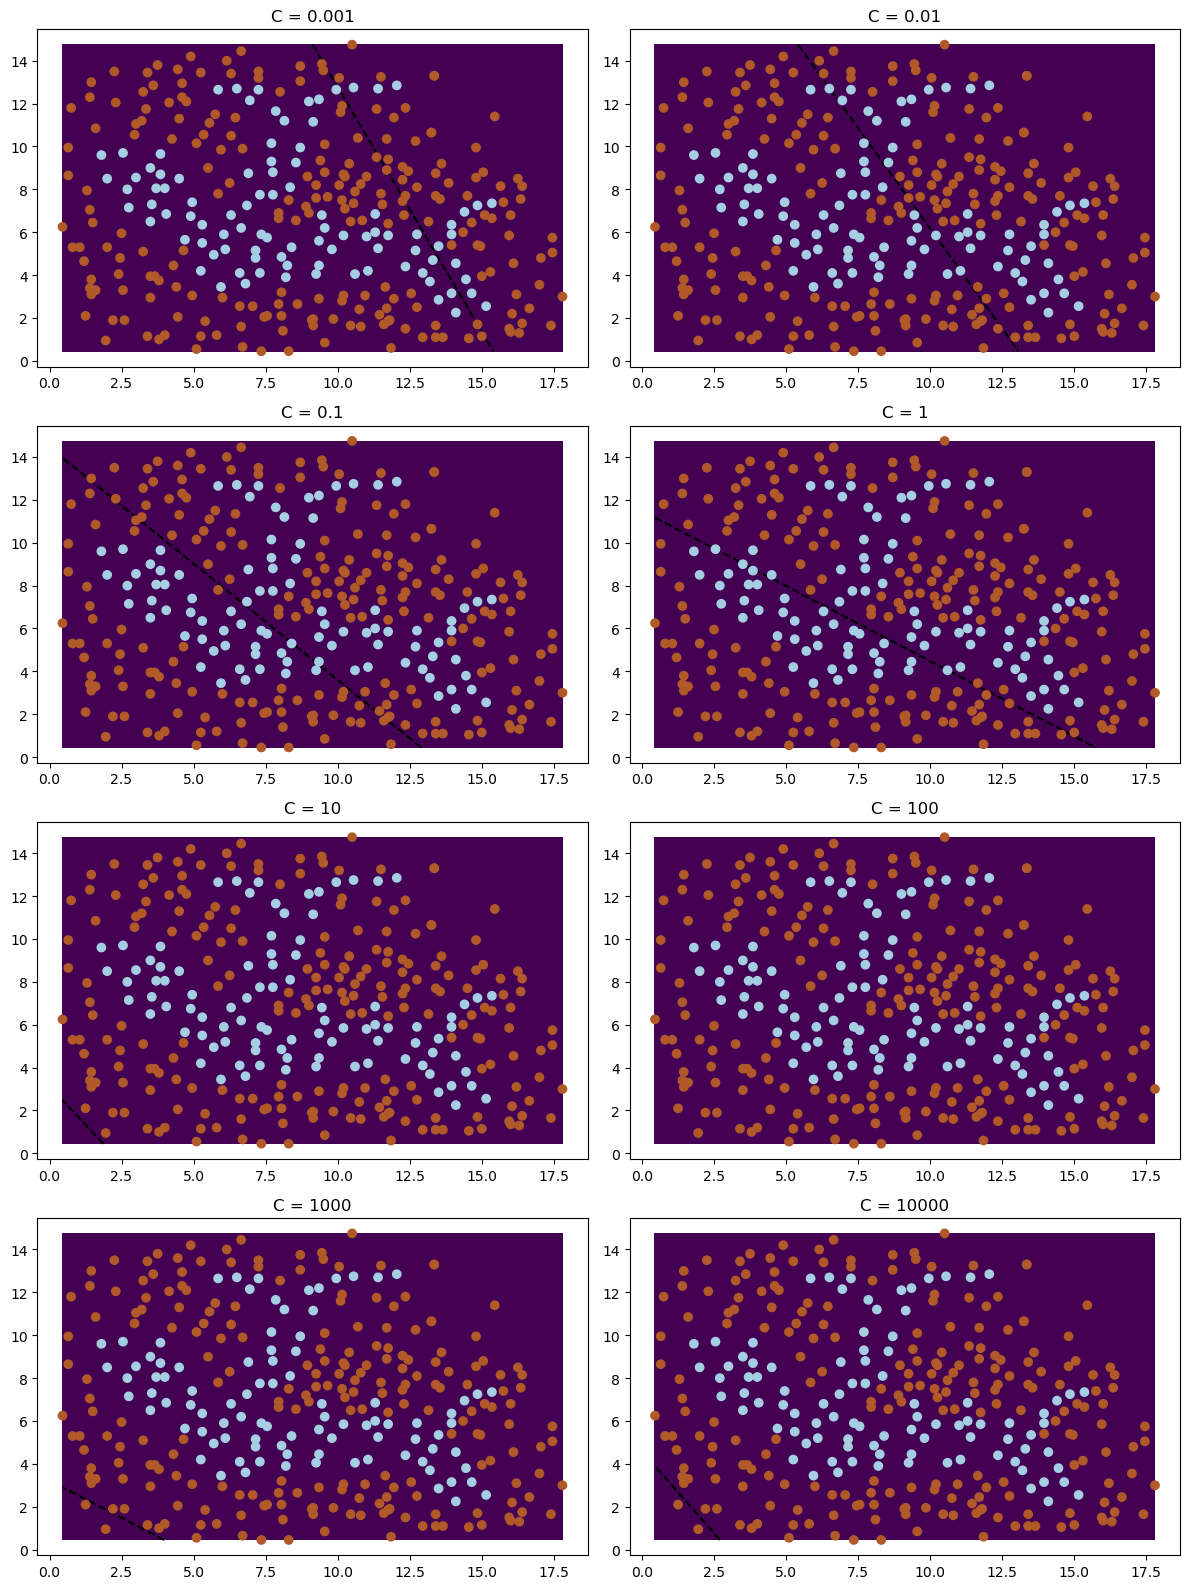

In [13]:
# Load the dataset
data = pd.read_csv('dataset2.csv',header=None)
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

# Values of C hyperaprameter
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
# I have added the 10^-3 value to make the graph grid symmetric.

# Create a 4x2 grid (enough for 7 plots) for the subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(12, 16))
axes = axes.flatten()

for idx, (c, ax) in enumerate(zip(c_values, axes)):
  # Train the SVM model
  svm_model = svm.SVC(kernel='linear',C=c)
  svm_model.fit(X, y)

  # Show the points
  ax.scatter(X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired)

  # Show the separating hyperplane
  ax.axis('tight')
  # Extract the limit of the data to construct the mesh
  x_min = X[:, 0].min()
  x_max = X[:, 0].max()
  y_min = X[:, 1].min()
  y_max = X[:, 1].max()

  # Create the mesh and obtain the Z value returned by the SVM
  XX, YY = np.mgrid[x_min:x_max:500j, y_min:y_max:500j]
  Z = svm_model.decision_function(np.c_[XX.ravel(), YY.ravel()])

  # Make a color plot including the margin hyperplanes (Z=-1 and Z=1) and the
  # separating hyperplane (Z=0)
  Z = Z.reshape(XX.shape)
  ax.pcolormesh(XX, YY, Z > 0)
  ax.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
                  levels=[-1, 0, 1])
  ax.set_title(f'C = {c}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the entire figure
plt.show()